<a href="https://colab.research.google.com/github/LILPANDA-BYTE/STOCK_PREIDICTION_ANALYSIS/blob/main/FORECASTING_WITH_GBM_%26_LIGHTGBM_%26_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'

# Define the headers
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']

# Load the data into a DataFrame, specifying that there are no headers in the file
df = pd.read_csv(file_path, delimiter=";",names=headers)

# Display the first few rows of the DataFrame
print(df.head())

    DateTime Stamp  Bar OPEN Bid Quote  Bar HIGH Bid Quote  Bar LOW Bid Quote  \
0  20070930 170000              0.8832              0.8832             0.8832   
1  20071007 170000              0.8823              0.8823             0.8823   
2  20071007 170100              0.8822              0.8822             0.8822   
3  20071007 170200              0.8822              0.8823             0.8822   
4  20071014 170000              0.8799              0.8799             0.8799   

   Bar CLOSE Bid Quote  Volume  
0               0.8832       0  
1               0.8823       0  
2               0.8822       0  
3               0.8822       0  
4               0.8799       0  


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess your data
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Convert the DateTime Stamp to datetime and sort
df['DateTime Stamp'] = pd.to_datetime(df['DateTime Stamp'])
df = df.sort_values('DateTime Stamp')

# Add features
df['log_volume'] = np.log(df['Volume'] + 1e-8)

# Define features and target
X = df[['Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'log_volume']]
y = df['Bar CLOSE Bid Quote']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100)] # Use the callback here
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.000145584	valid_1's rmse: 0.000147041


In [ ]:
# Make predictions
y_pred = model.predict(X_val, num_iteration=model.best_iteration)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')

RMSE: 0.0001470406651237591


In [ ]:
# Compare the predictions to actual values
comparison_df = pd.DataFrame({'Actual': (y_val), 'Predicted': y_pred})
print(comparison_df.head())

       Actual  Predicted
26824  0.8687   0.868590
6904   0.8780   0.877898
29154  0.8736   0.873655
49670  0.8874   0.887470
23313  0.8668   0.866699


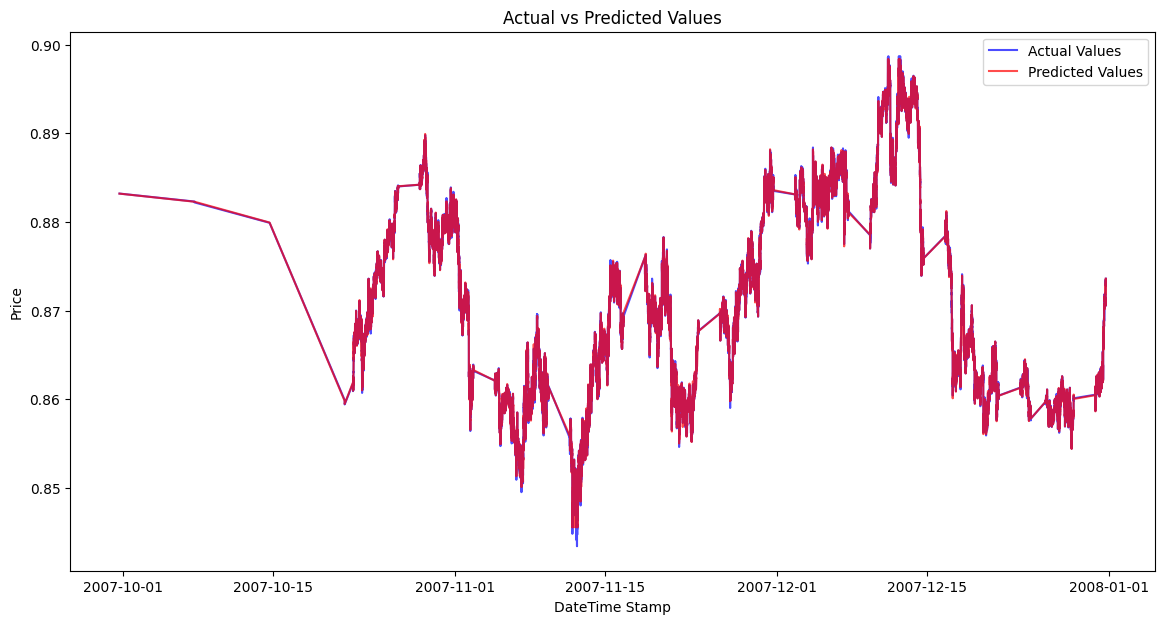

In [ ]:
import matplotlib.pyplot as plt
# Make predictions on the entire dataset
y_pred_full = model.predict(X, num_iteration=model.best_iteration)

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(df['DateTime Stamp'], y, label='Actual Values', color='blue', alpha=0.7)
plt.plot(df['DateTime Stamp'], y_pred_full, label='Predicted Values', color='red', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime Stamp')
plt.ylabel('Price')
plt.legend()
plt.show()

USING GBM

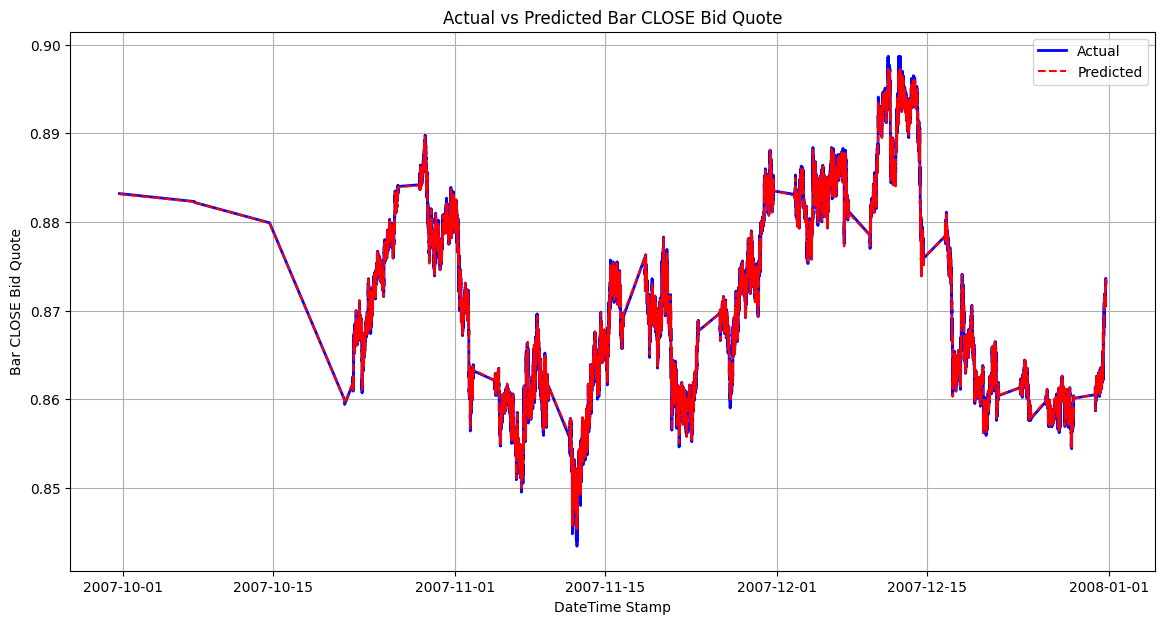

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load and preprocess your data
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Convert the DateTime Stamp to datetime and sort
df['DateTime Stamp'] = pd.to_datetime(df['DateTime Stamp'])
df = df.sort_values('DateTime Stamp')

# Add features
df['log_volume'] = np.log(df['Volume'] + 1e-8)

# Define features and target
X = df[['Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'log_volume']]
y = df['Bar CLOSE Bid Quote']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM model
gbm = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_all = gbm.predict(X)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df['DateTime Stamp'], y, label='Actual', color='blue', linewidth=2)
plt.plot(df['DateTime Stamp'], y_pred_all, label='Predicted', color='red', linestyle='--')
plt.xlabel('DateTime Stamp')
plt.ylabel('Bar CLOSE Bid Quote')
plt.title('Actual vs Predicted Bar CLOSE Bid Quote')
plt.legend()
plt.grid(True)
plt.show()

RMSE: 0.00017125494662080626


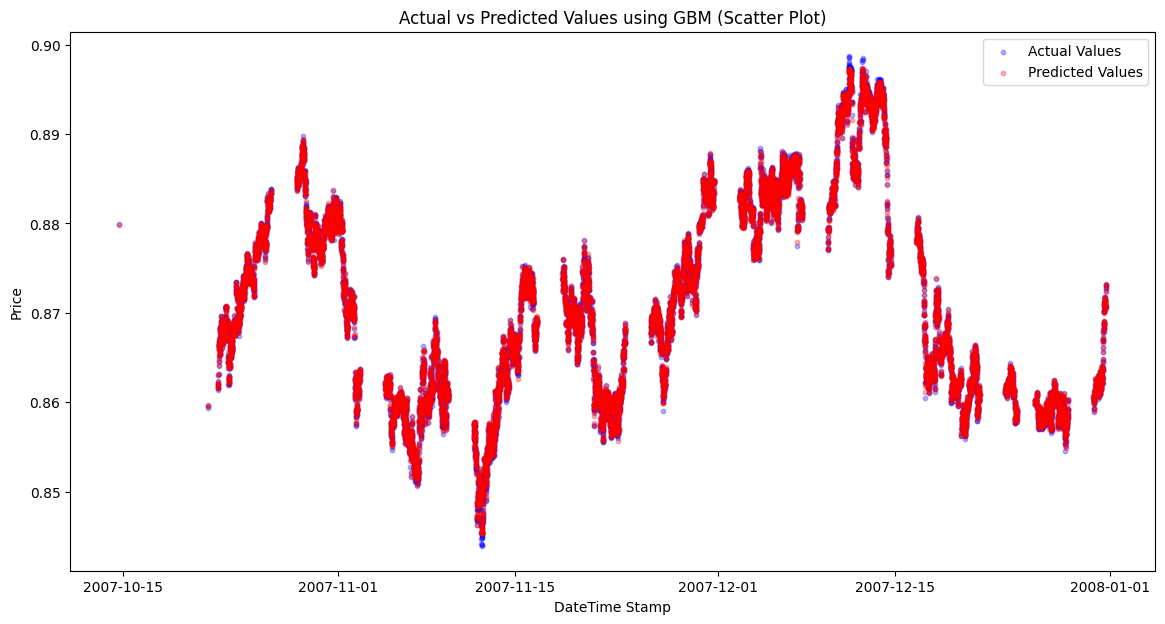

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load and preprocess your data
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Convert the DateTime Stamp to datetime and sort
df['DateTime Stamp'] = pd.to_datetime(df['DateTime Stamp'])
df = df.sort_values('DateTime Stamp')

# Add features
df['log_volume'] = np.log(df['Volume'] + 1e-8)

# Define features and target
X = df[['Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'log_volume']]
y = df['Bar CLOSE Bid Quote']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the corresponding datetime stamps for the test set
test_dates = df.iloc[y_test.index]['DateTime Stamp']

# Initialize and train the GBM model
gbm = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.scatter(test_dates, y_test, label='Actual Values', color='blue', alpha=0.3, s=10)
plt.scatter(test_dates, y_pred, label='Predicted Values', color='red', alpha=0.3, s=10)
plt.title('Actual vs Predicted Values using GBM (Scatter Plot)')
plt.xlabel('DateTime Stamp')
plt.ylabel('Price')
plt.legend()
plt.show()

USING CATBOOST

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


RMSE: 0.002430290078399102


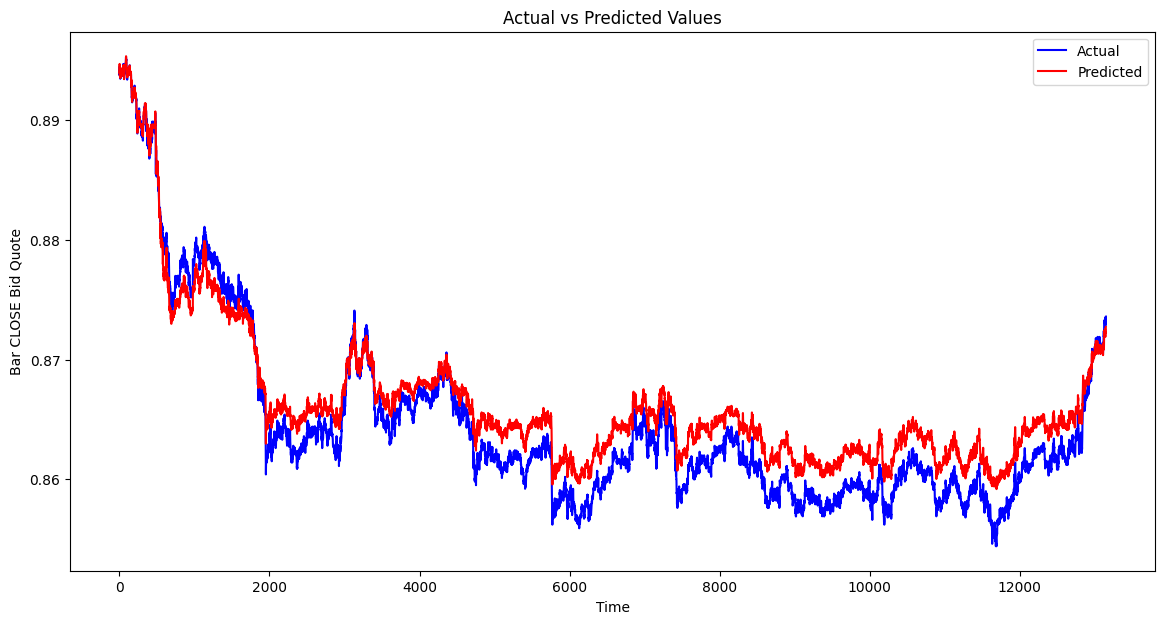

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Convert the DateTime Stamp to datetime and sort
df['DateTime Stamp'] = pd.to_datetime(df['DateTime Stamp'])
df = df.sort_values('DateTime Stamp')

# Prepare features and target
df['time_idx'] = df.index
df['log_volume'] = np.log(df['Volume'] + 1e-8)

features = ['time_idx', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'log_volume']
target = 'Bar CLOSE Bid Quote'

X = df[features]
y = df[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Initialize the CatBoostRegressor
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r')
plt.xlabel('Time')
plt.ylabel('Bar CLOSE Bid Quote')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()